In [1]:
import pandas as pd

# Categorical Binning Example
countries = pd.Series([
    'United States',
    'Canada',
    'Spain',
    'Italy',
    'Chile',
    'Brazil',
    'North Korea',
    'Vietnam',
    'Thailand',
    'Malaysia',
    'Myanmar',
    'Iceland',
    'Germany',
    'Cuba',
    'Mexico'
], name = "Countries")


groups = {
    'North America': ('United States', 'Canada', 'Iceland', 'Greenland', 'Mexico'),
    'Europe': ('France', 'Germany', 'United Kingdom', 'Belgium', 'Spain', 'Italy', 'Poland'),
    'South America': ('Chile', 'Brazil', 'Peru', 'Colombia', 'Ecuador'),
    'Asia': ('North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Myanmar')
}

from typing import Any

def country_group_map(series: pd.Series, groups: dict,
                      othervalue: Any=None) -> pd.Series:
    # Assign the dictionary pairs
    groups = {z: j for j, r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)

grouped_countries = country_group_map(countries, groups, othervalue='other')

In [2]:
df = pd.concat([countries, grouped_countries], axis=1)
df.columns = ['Country', 'Region']
df

,Country,Region
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South America
5,Brazil,South America
6,North Korea,Asia
7,Vietnam,Asia
8,Thailand,Asia
9,Malaysia,Asia


<Axes: xlabel='Region'>

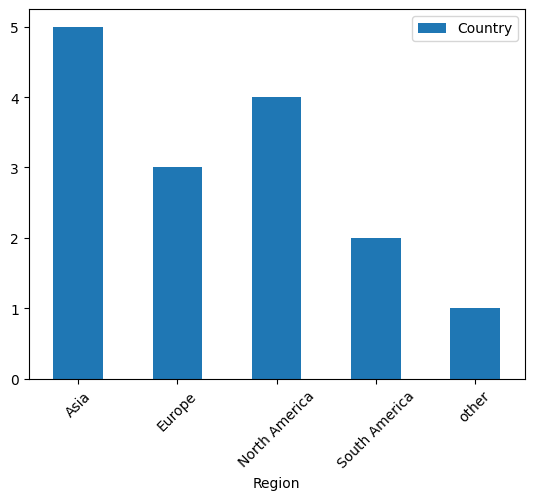

In [6]:
import matplotlib.pyplot as plt

data = df.groupby('Region').count()
data.plot.bar(rot=45)